In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('access_log_jul95.csv', sep='|', encoding='utf-8')

In [3]:
df.head(10)

,IP,DATE,TYPE,URI,RESULT,SIZE
0,199.72.81.55,01/Jul/1995:00:00:01,GET,/history/apollo/,200.0,6245
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06,GET,/shuttle/countdown/,200.0,3985
2,199.120.110.21,01/Jul/1995:00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html,200.0,4085
3,burger.letters.com,01/Jul/1995:00:00:11,GET,/shuttle/countdown/liftoff.html,304.0,0
4,199.120.110.21,01/Jul/1995:00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gif,200.0,4179
5,burger.letters.com,01/Jul/1995:00:00:12,GET,/images/NASA-logosmall.gif,304.0,0
6,burger.letters.com,01/Jul/1995:00:00:12,GET,/shuttle/countdown/video/livevideo.gif,200.0,0
7,205.212.115.106,01/Jul/1995:00:00:12,GET,/shuttle/countdown/countdown.html,200.0,3985
8,d104.aa.net,01/Jul/1995:00:00:13,GET,/shuttle/countdown/,200.0,3985
9,129.94.144.152,01/Jul/1995:00:00:13,GET,/,200.0,7074


In [5]:
dlist = list()
for uri in gr:
    dlist.append({"uri":uri[0], "count":uri[1].shape[0]})

In [6]:
df_count = pd.DataFrame(dlist)

In [7]:
df_count = df_count.sort_values(by=['count'], ascending=False)

In [8]:
df_count.to_csv('uri_count.csv', sep='|', encoding='utf-8', index=False)

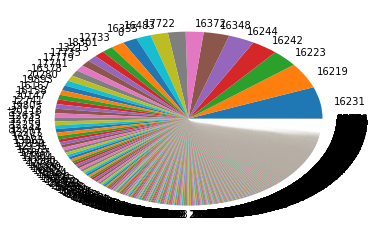

In [9]:
df_count['count'].plot.pie(subplots=True)
plt.show()

In [10]:
df_count.describe()

,count
count,21649.000000
mean,87.353226
std,1537.197489
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,111116.000000


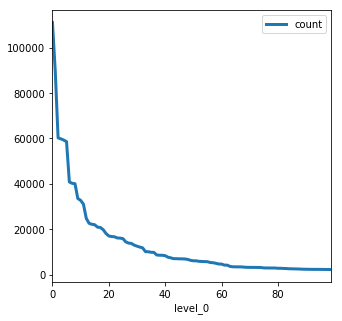

count       100.000000
mean      13278.960000
std       18328.150946
min        2250.000000
25%        3093.500000
50%        6204.000000
75%       15930.500000
max      111116.000000
Name: count, dtype: float64


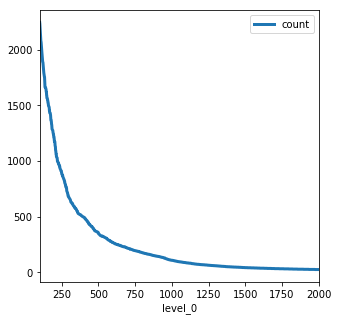

count    1900.000000
mean      263.748947
std       395.420948
min        24.000000
25%        40.000000
50%        94.000000
75%       285.250000
max      2243.000000
Name: count, dtype: float64


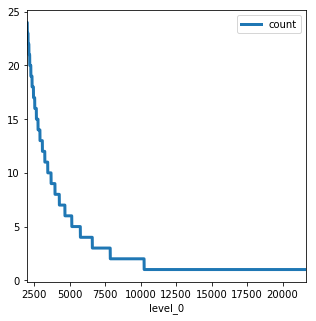

count    19649.000000
mean         3.160008
std          4.177998
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         24.000000
Name: count, dtype: float64


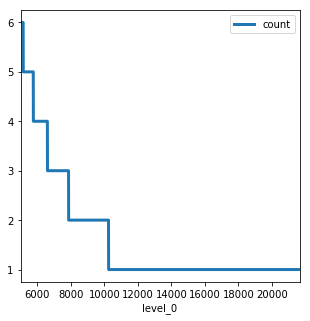

count    16649.000000
mean         1.638056
std          1.143031
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: count, dtype: float64


In [135]:
fig_size_x = 5
fig_size_y = 5
zone_01 = 100
zone_02 = 2000
zone_03 = 5000
df_count[:zone_01].plot(x='level_0', y='count', figsize=(fig_size_x, fig_size_y), linewidth=3)
plt.show()
print(df_count['count'][:zone_01].describe())

df_count[zone_01:zone_02].plot(x='level_0', y='count', figsize=(fig_size_x, fig_size_y), linewidth=3)
plt.show()
print(df_count['count'][zone_01:zone_02].describe())

df_count[zone_02:].plot(x='level_0', y='count', figsize=(fig_size_x, fig_size_y), linewidth=3)
plt.show()
print(df_count['count'][zone_02:].describe())

df_count[zone_03:].plot(x='level_0', y='count', figsize=(fig_size_x, fig_size_y), linewidth=3)
plt.show()
print(df_count['count'][zone_03:].describe())


In [36]:
gr_ip = df.groupby('IP')

In [37]:
d_ip_list = list()
for item in gr_ip:
    d_ip_list.append({"IP":item[0], "count":item[1].shape[0]})
df_ip = pd.DataFrame(d_ip_list)

In [41]:
df_ip = df_ip.sort_values(by='count', ascending=False)

In [44]:
df_ip.describe()

,count
count,81978.000000
mean,23.068531
std,127.719950
min,1.000000
25%,5.000000
50%,10.000000
75%,21.000000
max,17569.000000


In [107]:
df['day'] = df['DATE'].str.split('/')

In [112]:
df['daylen'] = df['day'].str.len()

In [116]:
df = df[df.daylen == 3]

In [121]:
df['dd'] = df.day.apply(lambda x: x[0])

In [124]:
df.columns

Index(['IP', 'DATE', 'TYPE', 'URI', 'RESULT', 'SIZE', 'day', 'daylen', 'dd'], dtype='object')

In [125]:
df = df[['IP', 'DATE', 'TYPE', 'URI', 'RESULT', 'SIZE', 'day']]

In [127]:
gr_day = df.groupby('day')

In [134]:
result = list()
for dd, df_day in gr_day:
    info_day = {'day': dd, 'count': df_day.shape[0]}
    result.append(info_day)
    
df_result = pd.DataFrame(result)

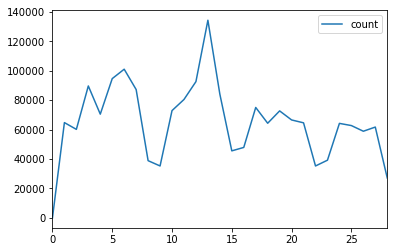

In [133]:
df_result.plot()
plt.show()